In [25]:
# resources
# https://www.youtube.com/watch?v=q3DLdMj5zLA
# https://www.youtube.com/watch?v=p_BsFdV_LUk

In [26]:
import os
import pprint
from osgeo import gdal, ogr, osr
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import geopandas as gpd

IMG_PATH = "../../../resources/segmentation_output_tif/"
OUTPUT_PATH = "../../../resources/ouput/"

pp = pprint.PrettyPrinter(indent=2)

def generate_image_paths(path):
    return sorted([f"{path}{name}" for name in os.listdir(path)])


paths = generate_image_paths(IMG_PATH)
print(paths)


['../../../resources/segmentation_output_tif/10828720_15.tif', '../../../resources/segmentation_output_tif/22078975_15.tif', '../../../resources/segmentation_output_tif/22228900_15.tif', '../../../resources/segmentation_output_tif/26278720_15.tif']


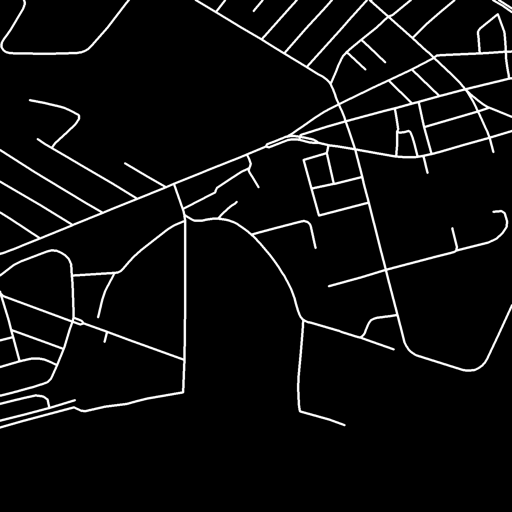

In [27]:
path = paths[0]
img = Image.open(path)
img.thumbnail((512, 512))
img.show()

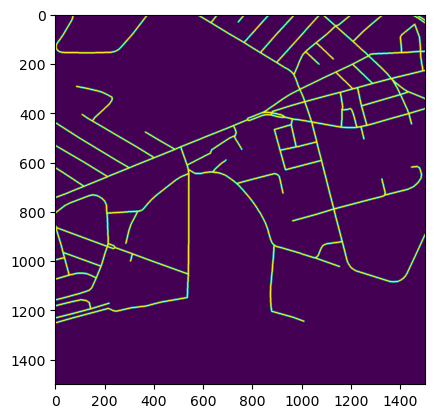

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)


In [28]:
raster = gdal.Open(path)
geo_transform = raster.GetGeoTransform()
projection = raster.GetProjection()
raster_band = raster.GetRasterBand(1)
arr = raster_band.ReadAsArray()

shape_projection = osr.SpatialReference()
shape_projection.ImportFromWkt(projection)

plt.figure()
plt.imshow(arr)
plt.show()

pp.pprint(arr)

In [29]:
output_file = "./output_shapefile.shp"
shapefile_driver = ogr.GetDriverByName("ESRI Shapefile")
output_shapefile = shapefile_driver.CreateDataSource(output_file)
shape_layer = output_shapefile.CreateLayer('layername', srs = shape_projection)

new_field = ogr.FieldDefn(str('ID'), ogr.OFTInteger)
shape_layer.CreateField(new_field)

0

In [30]:
gdal.Polygonize(raster_band, None, shape_layer, 0, [], callback=None)
output_shapefile.Destroy()
raster_band = None

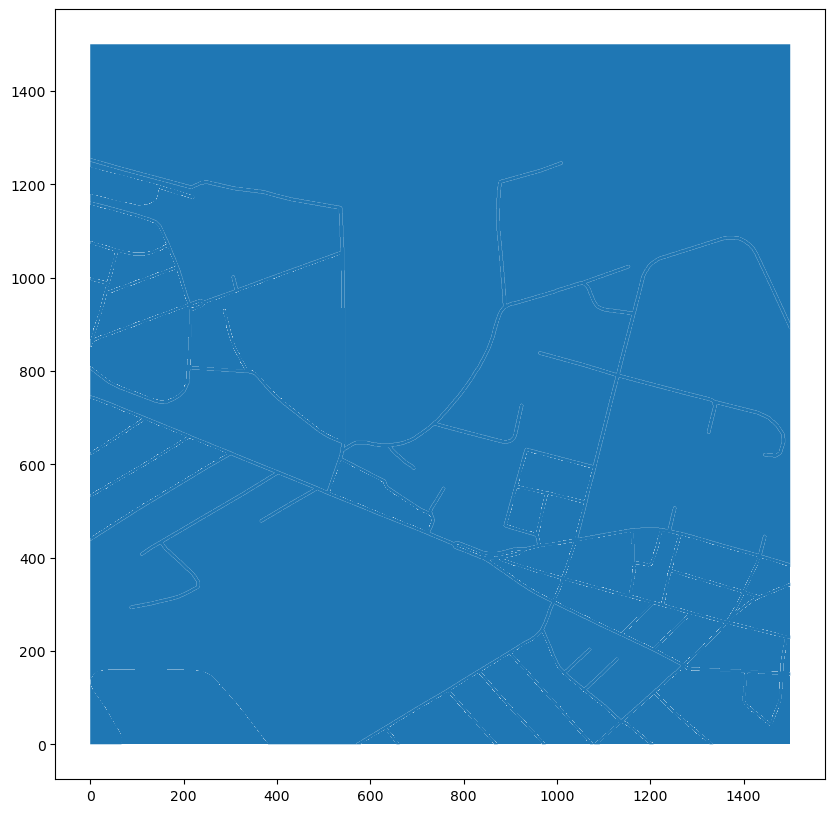

In [31]:
shapefile = gpd.read_file("output_shapefile.shp")
fig, ax = plt.subplots(figsize=(10, 10))

shapefile.plot(ax=ax)
plt.show()
